In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
MEDford_df = pd.read_csv('MEdford_US_Data_2015-2018_EDITED.csv') 
MEDford_df = MEDford_df.dropna()
MEDford_df

Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2015      1    1     0      30    0             0           0   
1      2015      1    1     1      30    0             0           0   
2      2015      1    1     2      30    0             0           0   
3      2015      1    1     3      30    0             0           0   
4      2015      1    1     4      30    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35035  2018     12   31    19      30    0             0           7   
35036  2018     12   31    20      30    0             0           7   
35037  2018     12   31    21      30    0             0           7   
35038  2018     12   31    22      30    0             0           4   
35039  2018     12   31    23      30    0             0           7   

       Wind Speed  Relative Humidity  Temperature  Pressure  
0             0.4              85.18         -1.0       970  
1             0.4              83.54         -1.0       970  
2             0.4              82.07         -1.0       970  
3             0.4              80.75         -1.0       970  
4             0.4              79.63         -2.0       970  
...           ...                ...          ...       ...  
35035         0.5              81.77          7.9       967  
35036         0.5              81.06          7.9       968  
35037         0.6              79.58          8.2       969  
35038         0.6              78.96          8.4       969  
35039         0.7              79.82          8.2       969  

[35040 rows x 12 columns]

In [3]:
MEDford_df_new = MEDford_df.copy()

MEDford_df_new['DateTime'] = MEDford_df[['Year', 'Month', 'Day', 'Hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
MEDford_df_new = MEDford_df_new.drop(columns = ['Year','Minute'])
MEDford_df_new['DateTime'] = pd.to_datetime(MEDford_df_new['DateTime']) 
MEDford_df_new.set_index(['DateTime'], drop=True, inplace=True)
MEDford_df_new

Month  Day  Hour  GHI  Clearsky GHI  Cloud Type  \
DateTime                                                               
2015-01-01 00:00:00      1    1     0    0             0           0   
2015-01-01 01:00:00      1    1     1    0             0           0   
2015-01-01 02:00:00      1    1     2    0             0           0   
2015-01-01 03:00:00      1    1     3    0             0           0   
2015-01-01 04:00:00      1    1     4    0             0           0   
...                    ...  ...   ...  ...           ...         ...   
2018-12-31 19:00:00     12   31    19    0             0           7   
2018-12-31 20:00:00     12   31    20    0             0           7   
2018-12-31 21:00:00     12   31    21    0             0           7   
2018-12-31 22:00:00     12   31    22    0             0           4   
2018-12-31 23:00:00     12   31    23    0             0           7   

                     Wind Speed  Relative Humidity  Temperature  Pressure  
DateTime                                                                   
2015-01-01 00:00:00         0.4              85.18         -1.0       970  
2015-01-01 01:00:00         0.4              83.54         -1.0       970  
2015-01-01 02:00:00         0.4              82.07         -1.0       970  
2015-01-01 03:00:00         0.4              80.75         -1.0       970  
2015-01-01 04:00:00         0.4              79.63         -2.0       970  
...                         ...                ...          ...       ...  
2018-12-31 19:00:00         0.5              81.77          7.9       967  
2018-12-31 20:00:00         0.5              81.06          7.9       968  
2018-12-31 21:00:00         0.6              79.58          8.2       969  
2018-12-31 22:00:00         0.6              78.96          8.4       969  
2018-12-31 23:00:00         0.7              79.82          8.2       969  

[35040 rows x 10 columns]

Text(0, 0.5, 'GHI ($w/m^2$)')

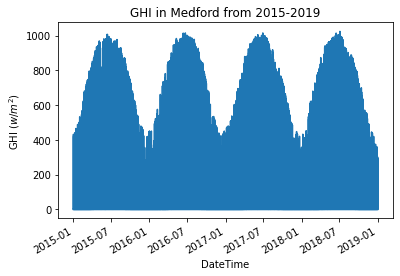

In [4]:
GHI = MEDford_df_new['GHI']
GHI.plot()
plt.title('GHI in Medford from 2015-2019')
plt.ylabel('GHI ($w/m^2$)')

In [5]:
def df_to_X_y_24(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(0, df.shape[0]-window_size-24):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size+24,3]
        y.append(label)
    return np.array(X), np.array(y)

In [6]:
window_size = 24
X,y = df_to_X_y_24(MEDford_df_new, 24)
m,n = X.shape[::3]
X = np.rollaxis(X,3,1).reshape(m,-1,n)
X

array([[[  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        ...,
        [  2. ,   1. ,   1. , ..., 970. , 970. , 970. ],
        [970. , 970. , 970. , ..., 960. , 960. , 960. ],
        [960. , 960. , 960. , ..., 960. , 960. , 960. ]],

       [[  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        ...,
        [  1. ,   1. ,   1. , ..., 970. , 970. , 970. ],
        [970. , 970. , 970. , ..., 960. , 960. , 960. ],
        [960. , 960. , 960. , ..., 960. , 960. , 960. ]],

       [[  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
        ...,
        [  1. ,   1. ,   1. , ..., 970. , 970. , 970. ],
        [970. , 970. , 970. , ..., 960. , 960

In [7]:
X_train, X_test, Y_train, Y_test = X[:26244],X[26244:], y[:26244], y[26244:] # Testing: from 30/12/2017 - 31/ 12/ 2018
print('Shape of X_train set:',X_train.shape) 
print('Shape of Y_train set:',Y_train.shape)
print('Shape of X_test set:',X_test.shape)
print('Shape of Y_test set:',Y_test.shape)

Shape of X_train set: (26244, 24, 10)
Shape of Y_train set: (26244,)
Shape of X_test set: (8748, 24, 10)
Shape of Y_test set: (8748,)


In [8]:
# from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import *
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.optimizers import Adam

# model = Sequential()
# model.add(InputLayer((24,10)))
# model.add(Conv1D(100,kernel_size = 2))
# model.add(Flatten())
# model.add(Dense(10,'relu'))
# model.add(Dense(1,'linear'))

# model.summary()

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

C:\Users\Hamza\anaconda3\envs\ml_proj\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/30
329/329 [==============================] - 113s 330ms/step - loss: 58301.5938 - val_loss: 23803.1387
Epoch 2/30
329/329 [==============================] - 110s 334ms/step - loss: 24375.5645 - val_loss: 10713.6875
Epoch 3/30
329/329 [==============================] - 111s 336ms/step - loss: 18830.7539 - val_loss: 9256.1758
Epoch 4/30
329/329 [==============================] - 109s 332ms/step - loss: 16145.6953 - val_loss: 8446.7803
Epoch 5/30
329/329 [==============================] - 108s 329ms/step - loss: 14245.0615 - val_loss: 8014.6758
Epoch 6/30
329/329 [==============================] - 404s 1s/step - loss: 13170.9443 - val_loss: 7483.9321
Epoch 7/30
329/329 [==============================] - 108s 330ms/step - loss: 12527.6650 - val_loss: 7307.3765
Epoch 8/30
329/329 [==============================] - 108s 328ms/step - loss: 11822.0508 - val_loss: 7209.6650
Epoch 9/30
329/329 [==============================] - 2573s 8s/step - loss: 11520.2861 - val_loss: 7018.8188
Epoc

7591.73486328125

In [11]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train prediction':train_predictions,'Actual':Y_train }, index = MEDford_df_new.index[:26244])
train_results

821/821 [==============================] - 13s 16ms/step


Train prediction  Actual
DateTime                                     
2015-01-01 00:00:00          3.036569     0.0
2015-01-01 01:00:00          0.979985     0.0
2015-01-01 02:00:00         -0.472565     0.0
2015-01-01 03:00:00         -2.667719     0.0
2015-01-01 04:00:00         -2.362514     0.0
...                               ...     ...
2017-12-30 07:00:00          6.269846     0.0
2017-12-30 08:00:00         38.906498    55.0
2017-12-30 09:00:00        142.984436   110.0
2017-12-30 10:00:00        223.045120   153.0
2017-12-30 11:00:00        245.354019   157.0

[26244 rows x 2 columns]

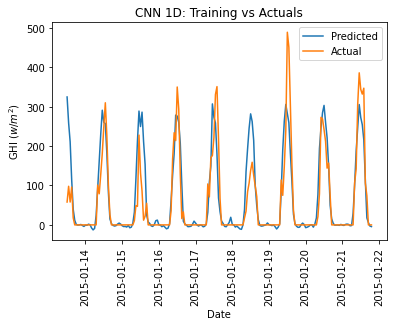

In [12]:
plt.plot(train_results['Train prediction'][300:500], label = 'Predicted')
plt.plot(train_results['Actual'][300:500], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('CNN 1D: Training vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

In [13]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'Test prediction':test_predictions,'Actual':Y_test },index = MEDford_df_new.index[26292:])
test_results

274/274 [==============================] - 5s 17ms/step


Test prediction  Actual
DateTime                                    
2018-01-01 12:00:00       262.705811   167.0
2018-01-01 13:00:00       198.656433   175.0
2018-01-01 14:00:00       193.923279   151.0
2018-01-01 15:00:00        77.211655    73.0
2018-01-01 16:00:00        18.650789    13.0
...                              ...     ...
2018-12-31 19:00:00        -2.269840     0.0
2018-12-31 20:00:00        -0.380776     0.0
2018-12-31 21:00:00         3.983366     0.0
2018-12-31 22:00:00         5.668876     0.0
2018-12-31 23:00:00        10.551777     0.0

[8748 rows x 2 columns]

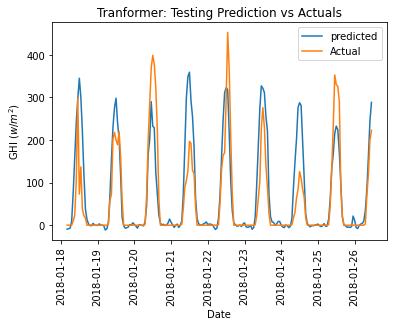

In [14]:
plt.plot(test_results['Test prediction'][400:600],label = 'predicted')
plt.plot(test_results['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Tranformer: Testing Prediction vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

In [15]:
from sklearn.metrics import r2_score
print('Training score:', r2_score(Y_train, train_results['Train prediction'] ))
print('Testing score:', r2_score(test_results['Actual'], test_results['Test prediction']))


Training score: 0.9020556147788832
Testing score: 0.9018432728132418


## Scenario 2

##### Winter: 12 ,1 ,2 
##### Spring: 3,4,5
##### Summer: 6,7,8
##### Fall : 9,10,11

In [16]:
Fall_TR = test_results['2018-9-1 01:00:00': '2018-11-30 23:00:00']
Spring_TR =test_results['2018-3-1 01:00:00': '2018-5-31 23:00:00']
Summer_TR = test_results['2018-6-1 01:00:00': '2018-8-31 23:00:00']
W = test_results['2018-1-1 01:00:00': '2018-2-28 23:00:00']
W.values.tolist()
Winter_TR = W.append(test_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])
Winter_TR

C:\Users\Hamza\AppData\Local\Temp\ipykernel_18960\2238393959.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Winter_TR = W.append(test_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])


Test prediction  Actual
DateTime                                    
2018-01-01 12:00:00       262.705811   167.0
2018-01-01 13:00:00       198.656433   175.0
2018-01-01 14:00:00       193.923279   151.0
2018-01-01 15:00:00        77.211655    73.0
2018-01-01 16:00:00        18.650789    13.0
...                              ...     ...
2018-12-31 19:00:00        -2.269840     0.0
2018-12-31 20:00:00        -0.380776     0.0
2018-12-31 21:00:00         3.983366     0.0
2018-12-31 22:00:00         5.668876     0.0
2018-12-31 23:00:00        10.551777     0.0

[2147 rows x 2 columns]

In [17]:
%store Fall_TR
%store Spring_TR
%store Summer_TR
%store Winter_TR

Stored 'Fall_TR' (DataFrame)
Stored 'Spring_TR' (DataFrame)
Stored 'Summer_TR' (DataFrame)
Stored 'Winter_TR' (DataFrame)


#### Winter

Transformer Winter Testing score: 0.7434496835589975


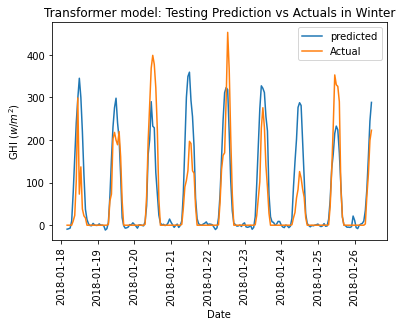

In [18]:
plt.plot(Winter_TR['Test prediction'][400:600],label = 'predicted')
plt.plot(Winter_TR['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Transformer model: Testing Prediction vs Actuals in Winter')
_=plt.xticks(rotation = 90)
plt.legend()
print('Transformer Winter Testing score:', r2_score(Winter_TR['Actual'], Winter_TR['Test prediction']))

#### Summer

Transformer Summer Testing score: 0.9586893341290226


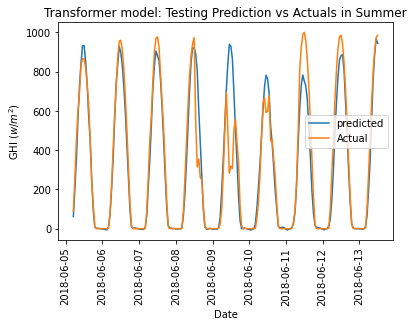

In [19]:
plt.plot(Summer_TR['Test prediction'][100:300],label = 'predicted')
plt.plot(Summer_TR['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Transformer model: Testing Prediction vs Actuals in Summer')
_=plt.xticks(rotation = 90)
plt.legend()
print('Transformer Summer Testing score:', r2_score(Summer_TR['Actual'], Summer_TR['Test prediction']))

#### Spring

Transformer Spring Testing score: 0.8100826374453156


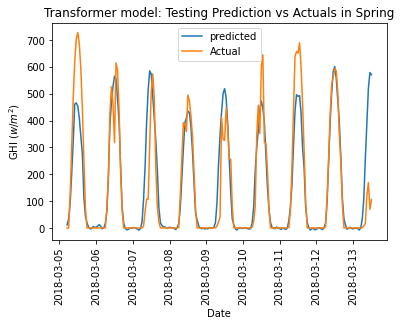

In [20]:
plt.plot(Spring_TR['Test prediction'][100:300],label = 'predicted')
plt.plot(Spring_TR['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Transformer model: Testing Prediction vs Actuals in Spring')
_=plt.xticks(rotation = 90)
plt.legend()
print('Transformer Spring Testing score:', r2_score(Spring_TR['Actual'], Spring_TR['Test prediction']))

#### Fall

Transformer Fall Testing score: 0.9100026061916051


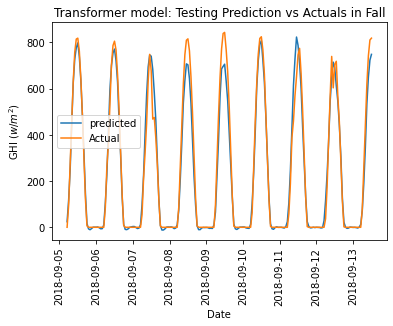

In [21]:
plt.plot(Fall_TR['Test prediction'][100:300],label = 'predicted')
plt.plot(Fall_TR['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Transformer model: Testing Prediction vs Actuals in Fall')
_=plt.xticks(rotation = 90)
plt.legend()
print('Transformer Fall Testing score:', r2_score(Fall_TR['Actual'], Fall_TR['Test prediction']))